# Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [117]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Load Data  

In [83]:
df=pd.read_csv('/content/drive/MyDrive/machine_learning/Classification/Breast Cancer/breast_cancer_detection.csv')

In [84]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [85]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [86]:
df.shape

(569, 33)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5



1.   There are 33 columns and 569 rowns in this dataset . The last column ie. 'Unnamed 32' is a null column it doesnt have any data
2.   All of the columns are of numeric datatypes ie. either float or int , excpet the target column . It is an Object.




In [88]:
df1=df.copy(deep=True)

In [89]:
df=df1.drop(df[['id','Unnamed: 32']],axis=1,inplace=True)


In [90]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


1. There are 596 samples presesnt in this dataset. 
2. The Average radius mean is concentrated arounf 14
3. 65% of the reports have radius mean between0 10.5 to 17.5.
4. 95% of the reports have radius mean between 7 to 21 and 99% lies between 3.5 to 24.5
5. Mean is greater than median , from this we can conclude that this column is right skewed and has outliers on the right side .

Lets plot a distplot to check the same 

# Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


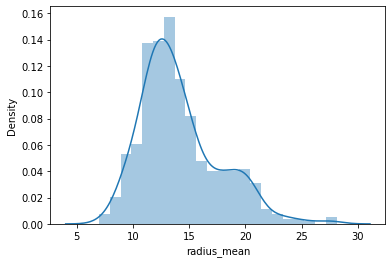

In [91]:
sns.distplot(df1['radius_mean']);

We can see that the data is right skewed and has outliers on the right sight of the graoh as the tail is pointing to the right.

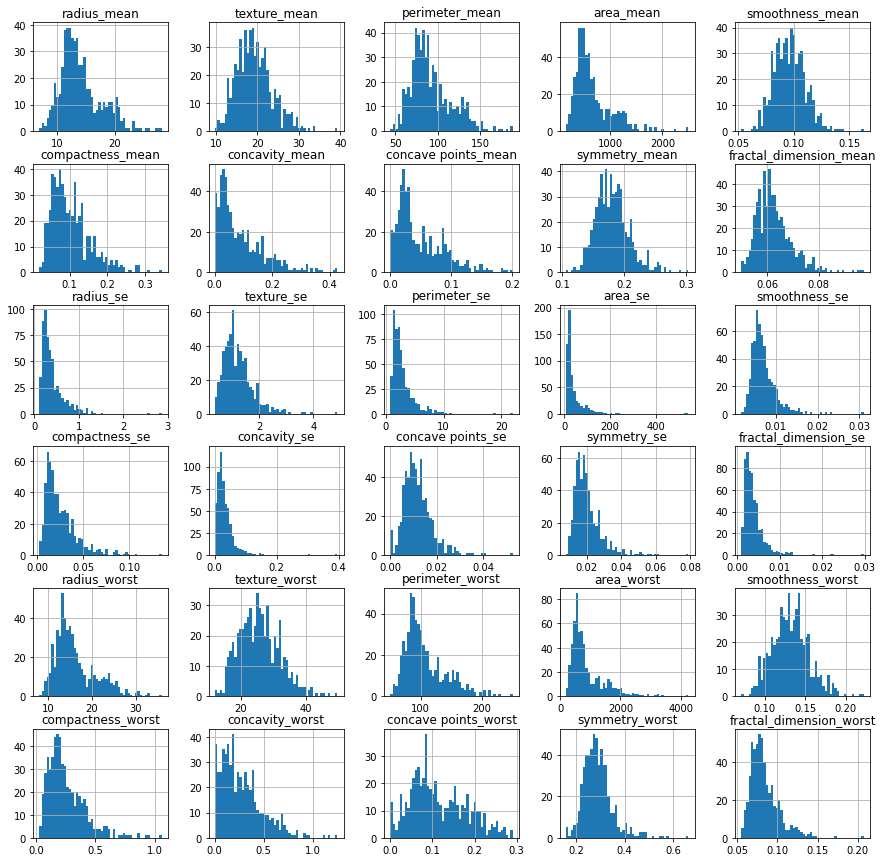

In [92]:
df1.hist(bins=50,figsize=(15,15));

From the Histogram it is clearly seen that most of the columns are right skewed.


## Data Preprocessing

### handling Categorical Column

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['diagnosis']=le.fit_transform(df1['diagnosis'])

In [94]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
df1['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Feature Selection

In [171]:
X= df1.drop('diagnosis',axis=1)
y=df1['diagnosis']

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
std=StandardScaler().fit(X_train)
X_train=std.transform(X_train)
X_test=std.transform(X_test)

# Training Algorithm Using Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(X_train,y_train)
y_pred=dt1.predict(X_test)

In [177]:
dt1_tr_acc=accuracy_score(y_true=y_train,y_pred=dt1.predict(X_train))
dt1_t_acc=accuracy_score(y_true=y_test,y_pred=y_pred)
print('Accuracy_score on train data :',dt1_tr_acc)
print('Accuracy score on test data: ',dt1_t_acc)

Accuracy_score on train data : 1.0
Accuracy score on test data:  0.9473684210526315


In [178]:
dt1_cr=(metrics.classification_report(y_test,y_pred))
print(dt1_cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [179]:
dt_f1=f1_score(y_test,y_pred)
dt_f1

0.9268292682926829

In [180]:
dt1_cm=confusion_matrix(y_test,y_pred)
dt1_cm

array([[70,  2],
       [ 4, 38]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


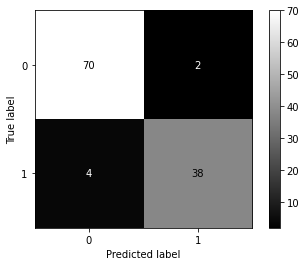

In [181]:
plot_confusion_matrix(dt1, X_test, y_test,cmap='gray');

# Training using Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [183]:
lr_tr_acc=accuracy_score(y_true=y_train,y_pred=lr.predict(X_train))
lr_t_acc= accuracy_score(y_true=y_test,y_pred=y_pred)
print('accuracy on train data :' ,lr_tr_acc)
print('accuracy on test data :',lr_t_acc)

accuracy on train data : 0.9868131868131869
accuracy on test data : 0.9649122807017544


In [184]:
lr_cr=(metrics.classification_report(y_test,y_pred))
print(lr_cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [185]:
lr_f=f1_score(y_test,y_pred)
lr_f

0.951219512195122

In [186]:
lr_cm=confusion_matrix(y_test,y_pred)
lr_cm

array([[71,  1],
       [ 3, 39]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


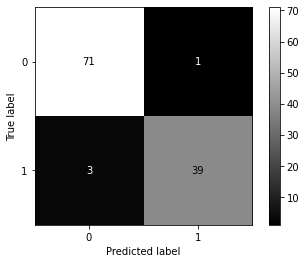

In [187]:
lrcm=plot_confusion_matrix(lr,X_test,y_test,cmap='gray')

# Support Vector Machine 

In [188]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)

In [189]:
sv_tr_acc=accuracy_score(y_true=y_train,y_pred=sv.predict(X_train))
sv_t_acc= accuracy_score(y_true=y_test,y_pred=y_pred)
print('accuracy on train data :' ,sv_tr_acc)
print('accuracy on test data :',sv_t_acc)

accuracy on train data : 0.989010989010989
accuracy on test data : 0.9649122807017544


In [190]:
sv_cr=(metrics.classification_report(y_test,y_pred))
print(sv_cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [191]:
sv_f=f1_score(y_test,y_pred)
sv_f

0.9500000000000001

In [113]:
sv_cm=confusion_matrix(y_test,y_pred)
sv_cm

array([[72,  0],
       [ 4, 38]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


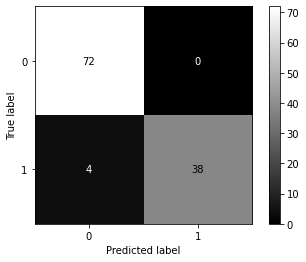

In [114]:
svcm=plot_confusion_matrix(sv,X_test,y_test,cmap='gray')

## Model Interpretation

Accuracies 

In [193]:
d={
    'Model':['Decision_Tree','Logistic_Regression','SVC'],
   'Train_Accuracy':[dt1_tr_acc,lr_tr_acc,sv_tr_acc],
   'Test_Accuracy':[dt1_t_acc,lr_t_acc,sv_t_acc],
   'f1_score':[dt_f1,lr_f,sv_f]
}
dd=pd.DataFrame(d)
dd

,Model,Train_Accuracy,Test_Accuracy,f1_score
0,Decision_Tree,1.000000,0.947368,0.926829
1,Logistic_Regression,0.986813,0.964912,0.951220
2,SVC,0.989011,0.964912,0.950000


Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


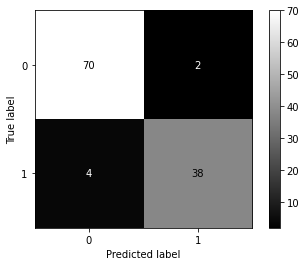

In [194]:
plot_confusion_matrix(dt1, X_test, y_test,cmap='gray');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


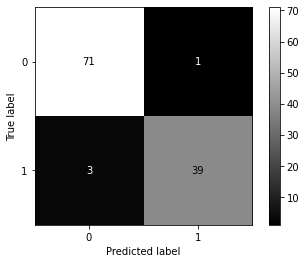

In [195]:
plot_confusion_matrix(lr, X_test, y_test,cmap='gray');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


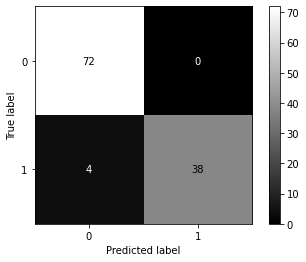

In [196]:
plot_confusion_matrix(sv, X_test, y_test,cmap='gray');

**Observations**
1. DecisionTree:
   * Decision Tree gives 70 True Negatives ie. 70 reports are non-cancerous and our model is predicting them correctly.
   * 38 reports are of Malignant or cancerous cells .
   * 4 samples shows type 2 error, ie. 4 samples are of cancerous cells but our model has predicted them as benign cells.
   * There are 2 type 1 errors. 
  
2. Logistic Regression 
  * 71 samples were diagnosed to be of Bening class, 39 are cancerous cells.
  * The type 2 error in this model has decreased . 3 samples were wrongly predicted as non-cancerous.
  * 1 sample shows type 1 error , ie. It was actualy a benign cell but our machine predicted as Malignant.

3. Support Vector Classifier 
    * SVC shows 72 True Negatives and 38 True Positives.
    * 4 samples have shown Type 2 Error and 0 Type 1 errors.


Taking the accuracies , confusion matrix and f1 score into consideration, Logistic Regression and SVC are giving us best Results

## Grid Search CV

In [197]:
from sklearn.model_selection import StratifiedShuffleSplit

In [198]:
params = {'C':[0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5,10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf','sigmoid']}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=100)
 
grid_search_cv = GridSearchCV(SVC(), params, cv=cv)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=100, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5,
                               10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']})

In [199]:
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)

0.9813186813186814
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [232]:
sv=SVC(C=10, gamma=0.01)

sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)

In [227]:
sv_cv_tr=accuracy_score(y_true=y_train,y_pred=sv.predict(X_train))
sv_cv= accuracy_score(y_true=y_test,y_pred=y_pred)
print(f'train_acciracy : {sv_cv_tr}')
print(f'test_accuracy : {sv_cv}')

train_acciracy : 0.9868131868131869
test_accuracy : 0.9824561403508771


In [210]:
svcr=(metrics.classification_report(y_test,y_pred))
print(svcr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [212]:
sv_g_f=f1_score(y_test,y_pred)
sv_g_f

0.975609756097561

In [213]:
svcv_cm=confusion_matrix(y_test,y_pred)
svcv_cm

array([[72,  0],
       [ 2, 40]])

In [217]:
params = {'C':[0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5,10],
              'solver': ['saga','lbfgs','liblinear'],
              'penalty':['l2','l1','elasticnet']}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=100)
 
grid_search_cv = GridSearchCV(LogisticRegression(), params, cv=cv)

grid_search_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=100, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5,
                               10],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['saga', 'lbfgs', 'liblinear']})

In [218]:
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)

0.9813186813186814
{'C': 0.9, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.9, solver='liblinear')


In [234]:
lg=LogisticRegression(C=0.9, solver='liblinear')
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [235]:
lg_tr=accuracy_score(y_true=y_train,y_pred=lg.predict(X_train))
lg_t=accuracy_score(y_true=y_test,y_pred=y_pred)
print(f'training accuracy : {lg_tr}')
print(f'test accuracy : {lg_t}')

training accuracy : 0.9868131868131869
test accuracy : 0.9736842105263158


In [222]:
lg_f=f1_score(y_test,y_pred)
print(f'F1 score : {lg_f}')

F1 score : 0.963855421686747


In [225]:
d1={
    'Model':['SVC','Logistic_Regression'],
   'Train_Accuracy':[sv_cv_tr,lg_tr],
   'Test_Accuracy':[sv_cv,lg_t],
   'f1_score':[sv_g_f,lg_f]
}
d2=pd.DataFrame(d1)
d2

,Model,Train_Accuracy,Test_Accuracy,f1_score
0,SVC,0.986813,0.982456,0.975610
1,Logistic_Regression,0.986813,0.973684,0.963855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


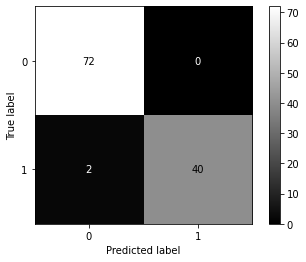

In [233]:
plot_confusion_matrix(sv, X_test, y_test,cmap='gray');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


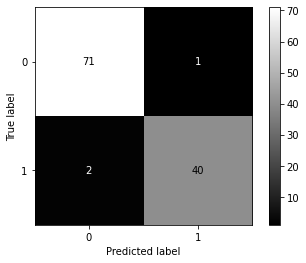

In [236]:
plot_confusion_matrix(lg, X_test, y_test,cmap='gray');

# Conclusion

After applying Grid Search CV to both of our models , we can conclude that Support Vector Classifier is the Best Algorithm for our Dataset.